In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt



My_work_dir = "/home/PC/Downloads/Masters-main"
os.chdir(My_work_dir)
files = (file for file in os.listdir(My_work_dir)if not file.startswith('.'))
all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(My_work_dir+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)
# Calculate the percentage of missing values for each column
missing_percentage = (all_months_data.isnull().sum() / len(all_months_data)) * 100

# Create a DataFrame to display missing value percentages
missing_info = pd.DataFrame({
    'Column Name': all_months_data.columns,
    'Missing Percentage': missing_percentage
})

# Sort the DataFrame by missing percentage in descending order
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Print the DataFrame
print(missing_info)


  Order ID                     Product Quantity Ordered Price Each  \
0   209921        USB-C Charging Cable                1      11.95   
1   209922          Macbook Pro Laptop                1     1700.0   
2   209923             ThinkPad Laptop                1     999.99   
3   209924            27in FHD Monitor                1     149.99   
4   209925  Bose SoundSport Headphones                1      99.99   

       Order Date                       Purchase Address  
0  06/23/19 19:34      950 Walnut St, Portland, ME 04101  
1  06/30/19 10:05     80 4th St, San Francisco, CA 94016  
2  06/24/19 20:18  402 Jackson St, Los Angeles, CA 90001  
3  06/05/19 10:21         560 10th St, Seattle, WA 98101  
4  06/25/19 18:58    545 2nd St, San Francisco, CA 94016  
                       Column Name  Missing Percentage
Order ID                  Order ID            0.291678
Product                    Product            0.291678
Quantity Ordered  Quantity Ordered            0.291678
Price

1- we notice that all columns have same missing percentage

In [28]:

# best sale by month

df = pd.DataFrame(all_months_data)

# Convert "Order Date" to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Extract the month and year from "Order Date"
df['Month'] = df['Order Date'].dt.month


In [33]:
df['Month']

0         6.0
1         6.0
2         6.0
3         6.0
4         6.0
         ... 
17656    11.0
17657    11.0
17658    11.0
17659    11.0
17660    11.0
Name: Month, Length: 1673550, dtype: float64

In [30]:
# Remove rows where "Quantity Ordered" or "Price Each" are not numeric
df = df[df['Quantity Ordered'].str.isnumeric() & df['Price Each'].str.replace('.', '', 1).str.isnumeric()]

# Convert "Quantity Ordered" and "Price Each" to numeric types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Convert "Order Date" to datetime format (if needed)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# Now, the "Quantity Ordered" and "Price Each" columns are in numeric formats, and non-numeric rows are removed
print(df)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       209921        USB-C Charging Cable                 1       11.95   
1       209922          Macbook Pro Laptop                 1     1700.00   
2       209923             ThinkPad Laptop                 1      999.99   
3       209924            27in FHD Monitor                 1      149.99   
4       209925  Bose SoundSport Headphones                 1       99.99   
...        ...                         ...               ...         ...   
17656   295660      AAA Batteries (4-pack)                 2        2.99   
17657   295661        USB-C Charging Cable                 1       11.95   
17658   295662    Lightning Charging Cable                 1       14.95   
17659   295663      AAA Batteries (4-pack)                 1        2.99   
17660   295664                Google Phone                 1      600.00   

               Order Date                       Purchase Address  Month  
0     2019-06

In [31]:
# Convert "Quantity Ordered" and "Price Each" to numeric types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

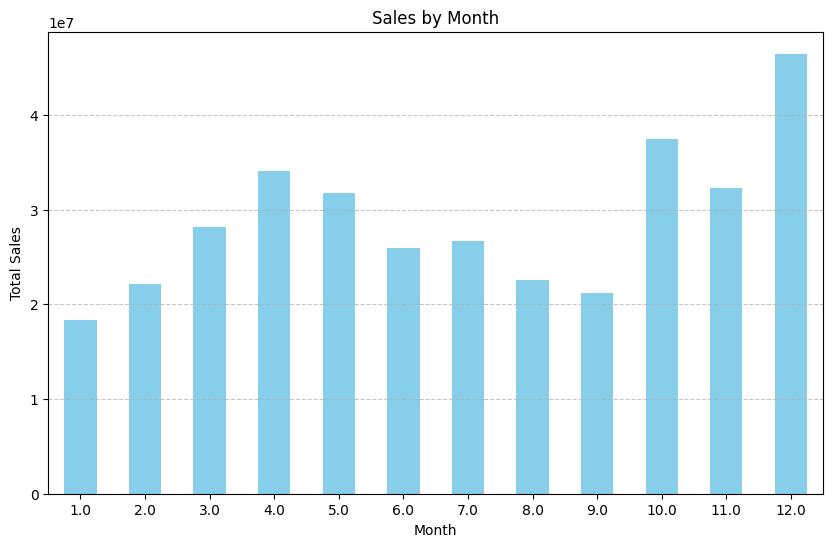

In [32]:
# Group by month and year, and calculate total sales
monthly_sales = df.groupby(['Month'])['Quantity Ordered'].sum() * df.groupby(['Month'])['Price Each'].mean()


# Plot sales by month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()